In [36]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
# use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(10, 4)})

In [37]:
#read the data
df = pd.read_csv('data.csv')

In [38]:
#show the first 5 rows
df.head()


,member_id,diabetes_type,gender,date_utc,bg_checks,avg_bg_value,count_hyper_reading,count_hypo_reading
0,10213339002895,Type 2,Female,2017-08-01,4,157.00000,2,1
1,10213339002895,Type 2,Female,2017-08-02,4,152.61111,1,1
2,10213339002895,Type 2,Female,2017-08-03,1,157.88235,1,0
3,10213339002895,Type 2,Female,2017-08-04,2,162.47058,2,0
4,10213339002895,Type 2,Female,2017-08-05,4,166.22223,2,1


In [39]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72977 entries, 0 to 72976
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_id            72977 non-null  int64  
 1   diabetes_type        72977 non-null  object 
 2   gender               72977 non-null  object 
 3   date_utc             72977 non-null  object 
 4   bg_checks            72977 non-null  int64  
 5   avg_bg_value         71799 non-null  float64
 6   count_hyper_reading  72977 non-null  int64  
 7   count_hypo_reading   72977 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.5+ MB


In [40]:
#check for null values
df.isnull().sum()


member_id                 0
diabetes_type             0
gender                    0
date_utc                  0
bg_checks                 0
avg_bg_value           1178
count_hyper_reading       0
count_hypo_reading        0
dtype: int64

In [41]:
#check for duplicates
df.duplicated().sum()

0

In [42]:
#change the data type of the date column to datetime format 2017-08-01	

df['date_utc'] = pd.to_datetime(df['date_utc'])

In [43]:
#change the data type of categorical columns: diabetes_type, gender, bg_checks, count_hyper_reading, count_hypo_reading

## create a function to change the data type of categorical columns
def change_dtype(df, col, dtype):
    df[col] = df[col].astype(dtype)
    return df[col].dtype

## create a list of categorical columns diabetes_type, gender, bg_checks, count_hyper_reading, count_hypo_reading
cat_cols = ['diabetes_type', 'gender', 'bg_checks', 'count_hyper_reading', 'count_hypo_reading']

## change the data type of categorical columns
for col in cat_cols:
    change_dtype(df, col, 'category')
    



In [44]:
#check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72977 entries, 0 to 72976
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   member_id            72977 non-null  int64         
 1   diabetes_type        72977 non-null  category      
 2   gender               72977 non-null  category      
 3   date_utc             72977 non-null  datetime64[ns]
 4   bg_checks            72977 non-null  category      
 5   avg_bg_value         71799 non-null  float64       
 6   count_hyper_reading  72977 non-null  category      
 7   count_hypo_reading   72977 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 2.0 MB


In [45]:
# show the descriptive for categorical columns

df.describe(include=['category'])

,diabetes_type,gender,bg_checks,count_hyper_reading,count_hypo_reading
count,72977,72977,72977,72977,72977
unique,2,2,36,35,12
top,Type 2,Male,3,1,0
freq,39417,39762,20265,20929,59130


___


# check of categorical columns



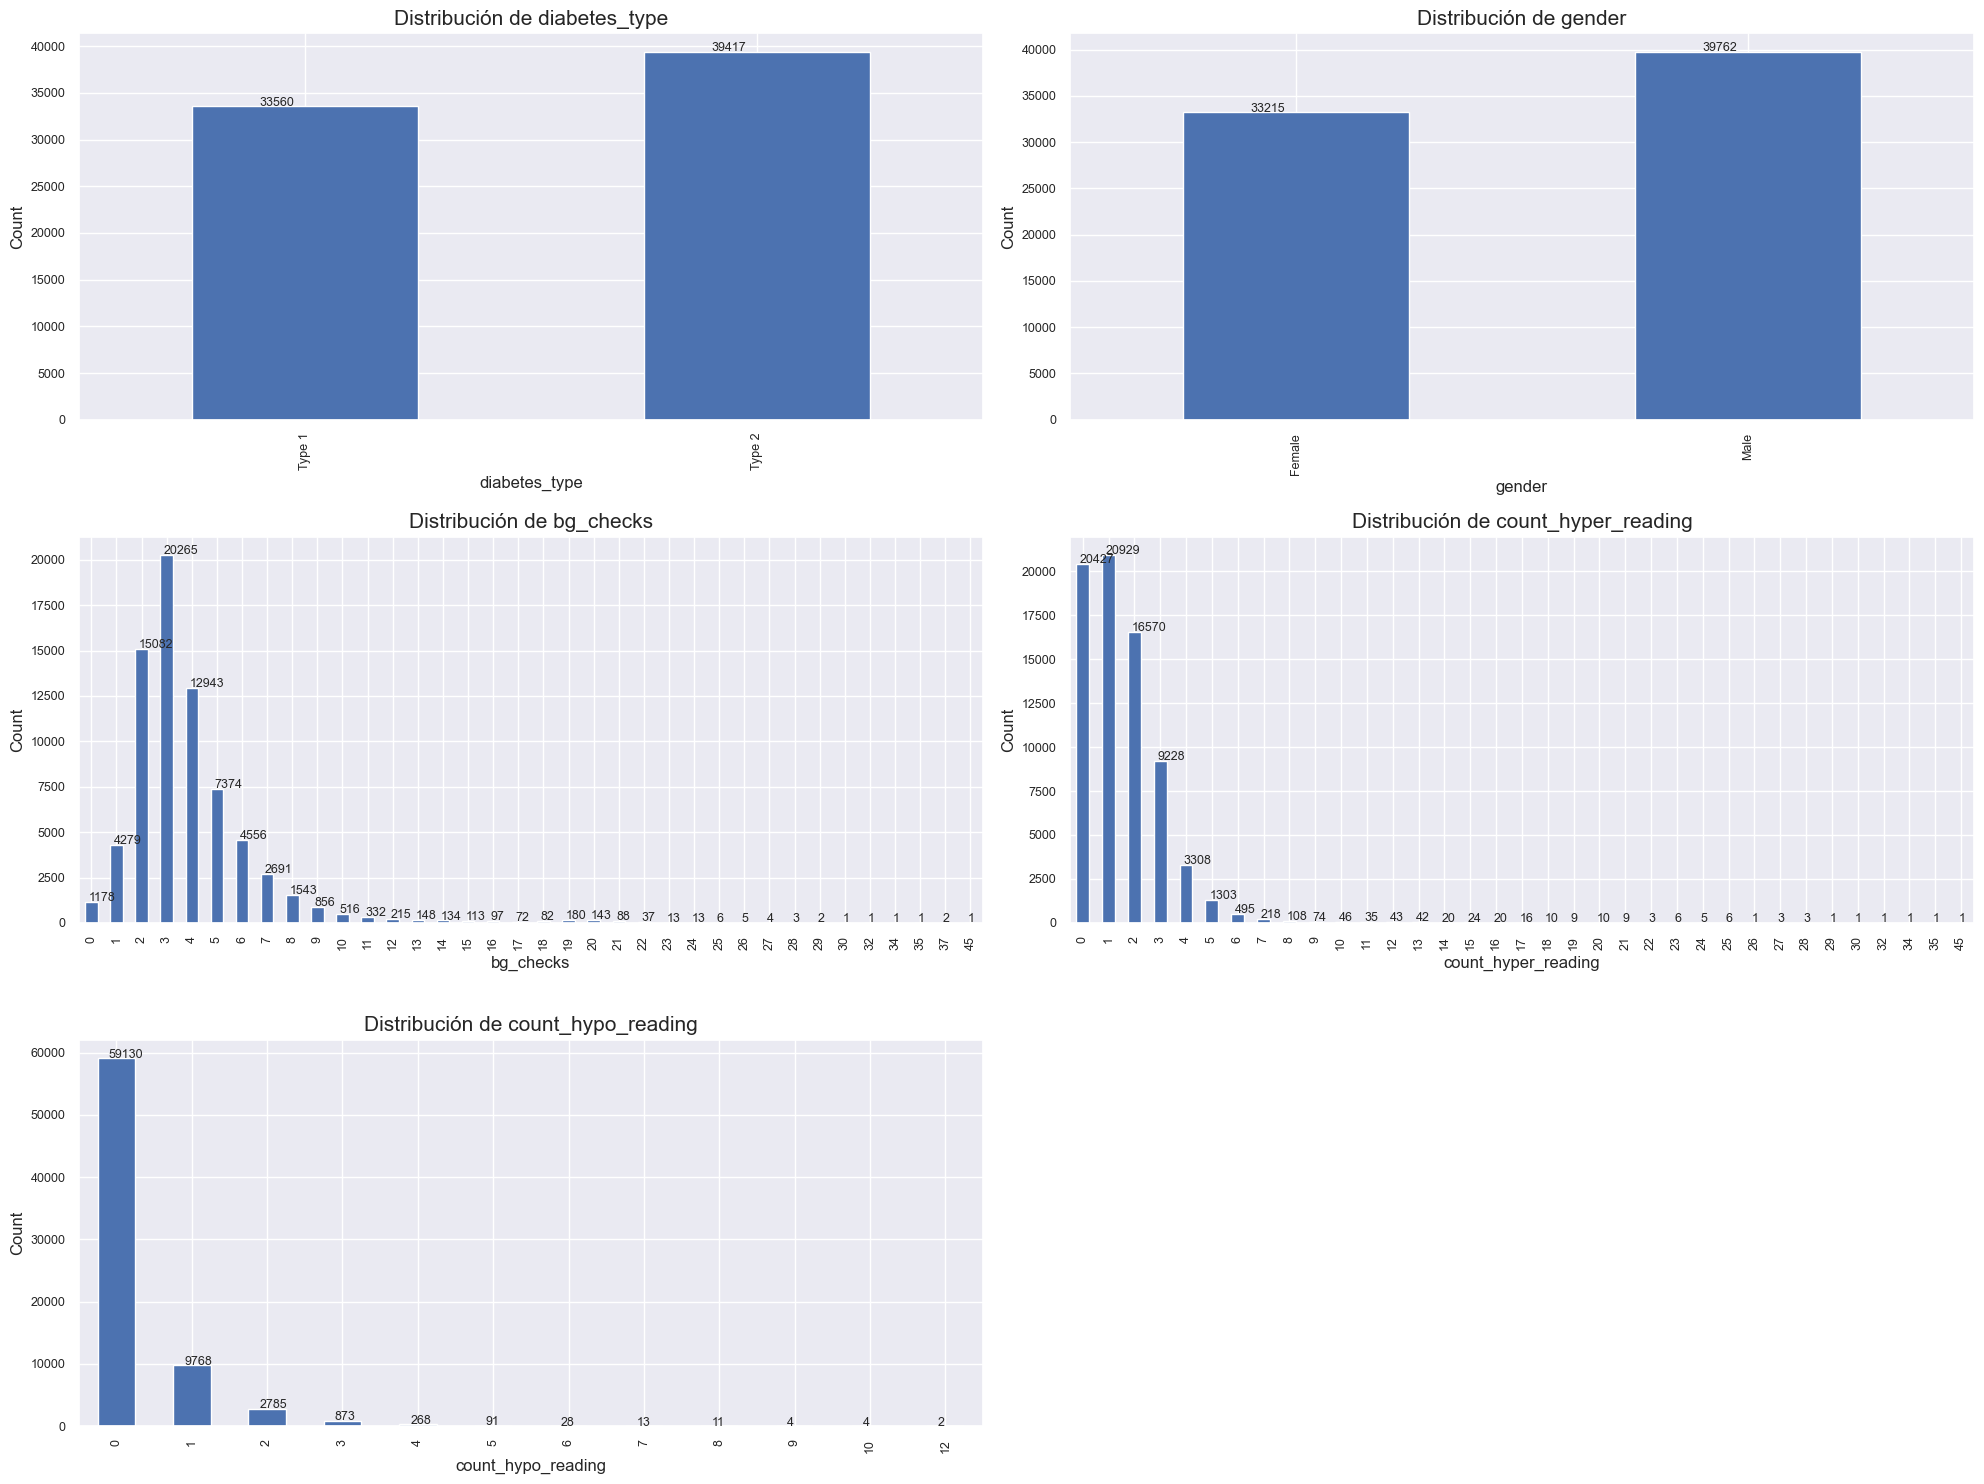

In [46]:

fig, axes = plt.subplots(3, 2, figsize=(20, 15))
axes = axes.ravel()

for i, column in enumerate(['diabetes_type', 'gender', 'bg_checks', 'count_hyper_reading', 'count_hypo_reading']):
    ax = axes[i]
    df[column].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribución de {column}', fontsize=15)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=9)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x()+0.15, p.get_height()+50), fontsize=9)

# Elimina el último gráfico vacío
axes[-1].axis('off')

plt.tight_layout()
plt.show()


In [47]:
#cross analysis between categorical columns by gender

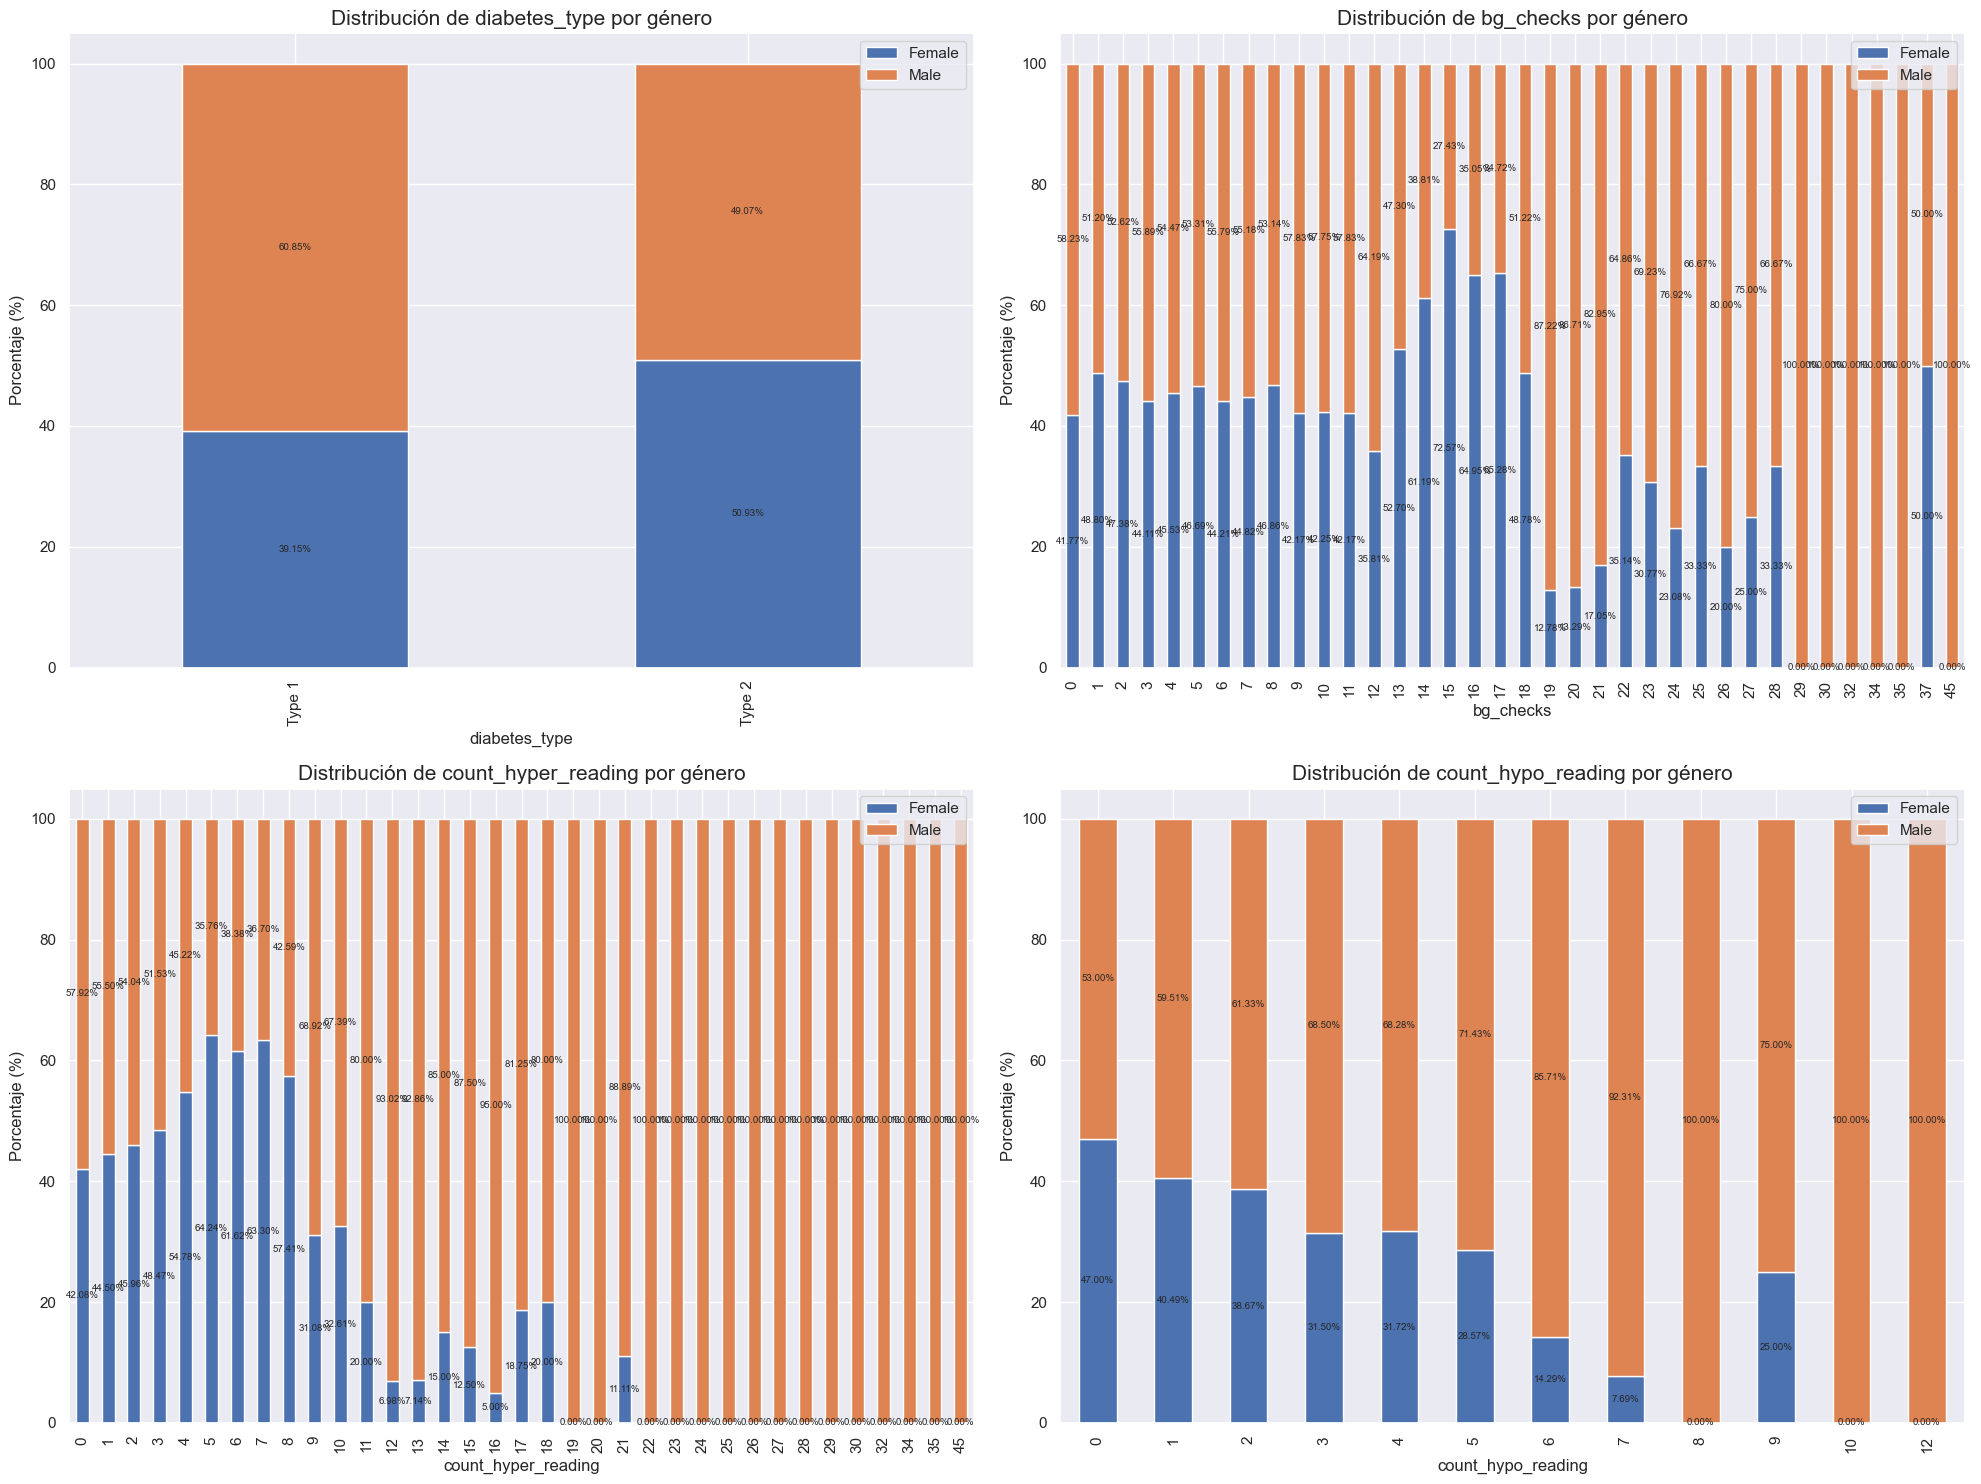

In [48]:
# Análisis cruzado mejorado con axes
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

for i, column in enumerate(['diabetes_type', 'bg_checks', 'count_hyper_reading', 'count_hypo_reading']):
    crosstab = pd.crosstab(df[column], df['gender'], normalize='index') * 100  # Normalización para obtener porcentajes
    ax = crosstab.plot(kind='bar', stacked=True, ax=axes[i])
    
    # Agregar etiquetas a cada segmento de la barra
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center',fontsize=7)
    
    ax.set_title(f'Distribución de {column} por género', fontsize=15)
    ax.set_ylabel('Porcentaje (%)', fontsize=12)
    ax.set_xlabel(column, fontsize=12)
    ax.legend(loc='upper right')  # Mover la leyenda al lado superior derecho

plt.tight_layout()
plt.show()



**diabetes_type by gender**

In [49]:

crosstab = pd.crosstab(df['diabetes_type'], df['gender'])
print(crosstab)

gender         Female   Male
diabetes_type               
Type 1          13140  20420
Type 2          20075  19342


Type 1 Diabetes: There are 13,140 females and 20,420 males diagnosed with Type 1 diabetes. This suggests that in the dataset, Type 1 diabetes is more prevalent in males than in females. 

Type 2 Diabetes: In contrast, there are 20,075 females and 19,342 males diagnosed with Type 2 diabetes, which indicates that Type 2 diabetes is slightly more common in females than in males within this dataset.

In [50]:
from scipy.stats import chi2_contingency
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['gender'], df['diabetes_type'])

# Calcular la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Valor de Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

Valor de Chi-cuadrado: 1013.1754548789314
Valor p: 2.4570585768836738e-222


The chi-square value is 1013.175, which is quite large. This indicates a significant difference in the distributions of 'gender' and 'diabetes_type' in the dataset.
The p-value is extremely small (2.4570585768836738e-222), well below the commonly used significance level (e.g., 0.05). This provides strong evidence that the observed association between 'gender' and 'diabetes_type' in the data is highly unlikely to have occurred by chance.

Therefore, the conclusion is that there is a highly significant association between 'gender' and 'diabetes_type' in the dataset. It suggests that 'gender' is not independent of 'diabetes_type', and there is a relationship between these variables. However, it's important to note that the chi-square test does not reveal the direction or strength of the association, only that an association exists

**bg_checks by gender** 

In [51]:
# bg_checks by gender

crosstab_norm = pd.crosstab(df['bg_checks'], df['gender'], normalize='index') * 100

# Imprimir la tabla
print(crosstab_norm)

gender        Female        Male
bg_checks                       
0          41.765705   58.234295
1          48.796448   51.203552
2          47.380984   52.619016
3          44.110535   55.889465
4          45.530403   54.469597
5          46.691077   53.308923
6          44.205443   55.794557
7          44.816054   55.183946
8          46.856773   53.143227
9          42.172897   57.827103
10         42.248062   57.751938
11         42.168675   57.831325
12         35.813953   64.186047
13         52.702703   47.297297
14         61.194030   38.805970
15         72.566372   27.433628
16         64.948454   35.051546
17         65.277778   34.722222
18         48.780488   51.219512
19         12.777778   87.222222
20         13.286713   86.713287
21         17.045455   82.954545
22         35.135135   64.864865
23         30.769231   69.230769
24         23.076923   76.923077
25         33.333333   66.666667
26         20.000000   80.000000
27         25.000000   75.000000
28        

Overall, men appear to conduct more blood glucose checks ('bg_checks') than women. In most of the 'bg_checks' categories, the percentage of men is higher than that of women.  

However, there are a few exceptions to this trend. For instance, in the 13, 14, 15, 16, 17, 23, 25, 27, 28, and 37 checks categories, women have a higher percentage.  

In the 19, 20, 21, 22, 24, 26, 29, 30, 32, 34, and 45 checks categories, men account for a very high percentage, even up to 100% in some cases. This suggests that in this dataset, there are men who conduct a very high number of blood glucose checks, more so than women.  

For categories with a very high amount of 'bg_checks' (like 29, 30, 32, 34, 35, and 45), only men are represented in this dataset. This could indicate that men are more likely to perform an extremely high number of blood glucose checks, or it could simply be a characteristic of this particular dataset.

In [52]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['bg_checks'], df['gender'])

# Realizar la prueba de independencia del chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 343.6036859131509
P-value: 2.37833918271884e-52


The chi-square statistic is 343.604. 

The p-value is 2.378 x 10^-52, which is extremely small. 

These results indicate a strong association between 'bg_checks' and 'gender' in the dataset. The small p-value suggests that the observed association is highly unlikely to have occurred by chance alone.

**count_hyper_reading by gender**

In [53]:

crosstab = pd.crosstab(df['count_hyper_reading'], df['gender'])
print(crosstab)

gender               Female   Male
count_hyper_reading               
0                      8595  11832
1                      9313  11616
2                      7616   8954
3                      4473   4755
4                      1812   1496
5                       837    466
6                       305    190
7                       138     80
8                        62     46
9                        23     51
10                       15     31
11                        7     28
12                        3     40
13                        3     39
14                        3     17
15                        3     21
16                        1     19
17                        3     13
18                        2      8
19                        0      9
20                        0     10
21                        1      8
22                        0      3
23                        0      6
24                        0      5
25                        0      6
26                  

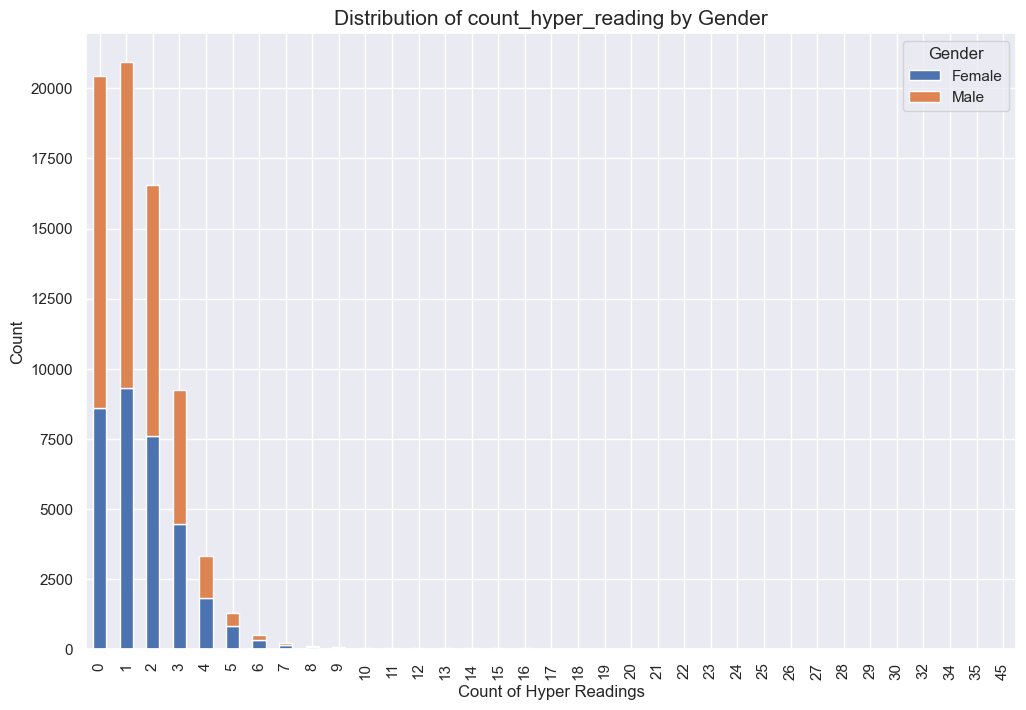

In [54]:
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of count_hyper_reading by Gender', fontsize=15)
plt.xlabel('Count of Hyper Readings', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.show()


Most people in the data set have a low 'count_hyper_reading', with a value of 0 or 1. For both men and women, these low counts are more common than higher counts. 

As the count of hyperglycemic readings increases, a decrease in the number of individuals in both genders is observed. This suggests that people tend to have fewer hyperglycemic readings as the count increases. 

There are higher numbers of males in the lower counts of hyperglycemic readings (0-4), while females outnumber males in the higher counts (5 or more). 

Overall, there is a trend toward a decrease in numbers as the count of hyperglycemic readings increases for both males and females. 

In [55]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['count_hyper_reading'], df['gender'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 679.7409618680416
P-value: 3.957285424304111e-121


These results indicate a strong association between 'count_hyper_reading' and 'gender' in the dataset. The small p-value suggests that the observed association is highly unlikely to have occurred by chance alone. 

Therefore, we can conclude that there is a significant relationship between 'count_hyper_reading' and 'gender'

**count_hypo_reading by gender** 

In [56]:

crosstab = pd.crosstab(df['count_hypo_reading'], df['gender'])
print(crosstab)

gender              Female   Male
count_hypo_reading               
0                    27791  31339
1                     3955   5813
2                     1077   1708
3                      275    598
4                       85    183
5                       26     65
6                        4     24
7                        1     12
8                        0     11
9                        1      3
10                       0      4
12                       0      2


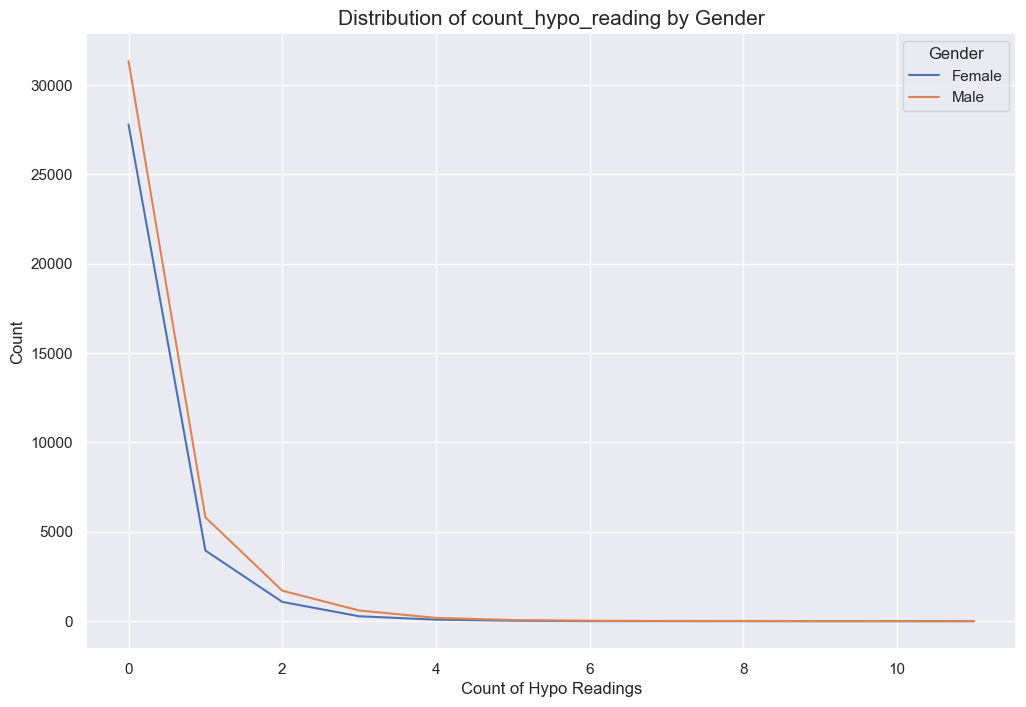

In [57]:
# Crear un gráfico de línea
crosstab.plot(kind='line', figsize=(12, 8))
plt.title('Distribution of count_hypo_reading by Gender', fontsize=15)
plt.xlabel('Count of Hypo Readings', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.show()


The majority of individuals in the dataset have a count of hypo readings ('count_hypo_reading') of 0. Both females and males show a higher count in this category compared to other counts.

As the count of hypo readings increases, the number of individuals decreases. This indicates that fewer individuals have higher counts of hypo readings.

Females generally have higher counts of hypo readings compared to males across different count categories.

The counts of hypo readings gradually decrease, with a smaller number of individuals in each higher count category for both females and males.

In [58]:


# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['count_hypo_reading'], df['gender'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 338.29414805026715
P-value: 7.249896828884194e-66


The chi-square statistic is 338.294.
The p-value isis extremely small.

These results indicate a strong association between 'count_hypo_reading' and 'gender' in the dataset. The small p-value suggests that the observed association is highly unlikely to have occurred by chance alone

___

**avg_bg_value over time**

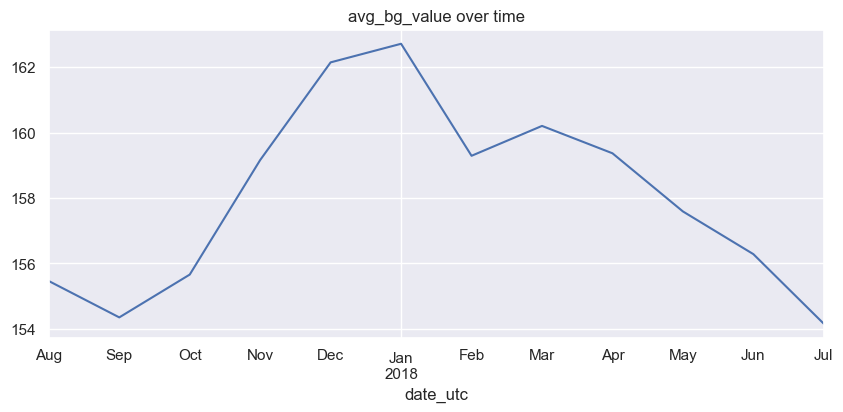

In [60]:
df.set_index('date_utc', inplace=True)
df['avg_bg_value'].resample('M').mean().plot()  # Cambia 'M' por la frecuencia deseada
plt.title('avg_bg_value over time')
plt.show()



There is a general fluctuation in the average blood glucose values over the given time period.
From August 2017 to December 2017, there is a gradual increase in the average blood glucose values.
The peak average blood glucose value is observed in January 2018, followed by a slight decrease in the subsequent months.
The average blood glucose values show some variability, with fluctuations between months.
Overall, the average blood glucose values seem to remain within a certain range, without any significant upward or downward trend over this specific time period.